In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

DATA_SOURCE = "data/sentiment_tweets.csv" # 데이터셋 링크 : https://www.kaggle.com/datasets/kazanova/sentiment140/data

In [2]:
df = pd.read_csv(
    DATA_SOURCE, 
    encoding="latin1",
    header=None,
    names=["target", "ids", "date", "flag", "user", "text"]
)

df.head()


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
# negative / positive 데이터 분리
negative_df = df[df["target"] == 0]
positive_df = df[df["target"] == 4]

In [4]:
SAMPLE_SIZE = 3000

negative_sample = negative_df.sample(
    n = min(SAMPLE_SIZE, len(negative_df)),
    random_state = 0
)

positive_sample = positive_df.sample(
    n = min(SAMPLE_SIZE, len(positive_df)),
    random_state = 0
)

In [5]:
def extract_words(texts):
    words = []
    for text in texts:
        text = str(text).lower()
        words.extend(text.split())
    return words

negative_words = extract_words(negative_sample["text"])
positive_words = extract_words(positive_sample["text"])

In [6]:
negative_text_for_wordcloud = " ".join(
    random.sample(negative_words, min(200, len(negative_words)))
)

positive_text_for_wordcloud = " ".join(
    random.sample(positive_words, min(200, len(positive_words)))
)

In [7]:
negative_wordcloud = WordCloud(
    width=600,
    height=400,
    background_color="white",
    max_words=200
).generate(negative_text_for_wordcloud)

positive_wordcloud = WordCloud(
    width=600,
    height=400,
    background_color="white",
    max_words=200
).generate(positive_text_for_wordcloud)

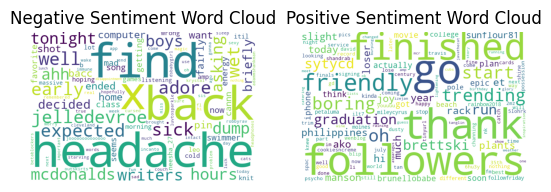

In [8]:
fig, axes = plt.subplots(1, 2)

axes[0].imshow(negative_wordcloud)
axes[0].set_title("Negative Sentiment Word Cloud")
axes[0].axis("off")

axes[1].imshow(positive_wordcloud)
axes[1].set_title("Positive Sentiment Word Cloud")
axes[1].axis("off")

plt.show()